<a href="https://colab.research.google.com/github/it21813702/ML_Assignment_1/blob/main/ML_Assignment_p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading and Initial Exploration

In [ ]:
# Import necessary libraries for data manipulation, visualization, and preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [ ]:
# load the dataset
df = pd.read_csv('Loan_default.csv')

# print some basic infor about the dataset
print("dataset shape:", df.shape)

# print the initial rows of the dataset, can specidy how many by including a num in the brackets
df.head(3)

dataset shape: (255347, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1



Missing Values per column: 
LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

Summary statistics:
                 Age         Income     LoanAmount    CreditScore  \
count  255347.000000  255347.000000  255347.000000  255347.000000   
mean       43.498306   82499.304597  127578.865512     574.264346   
std        14.990258   38963.013729   70840.706142     158.903867   
min        18.000000   15000.000000    5000.000000     300.000000   
25%        31.000000   48825.500000   66156.000000     437.000000   
50%        43.000000   82466.000000  127556.000000     574.000000   
75%        56.000000  116219.000000  188985.000000     712.000000   
max        69.000000  149

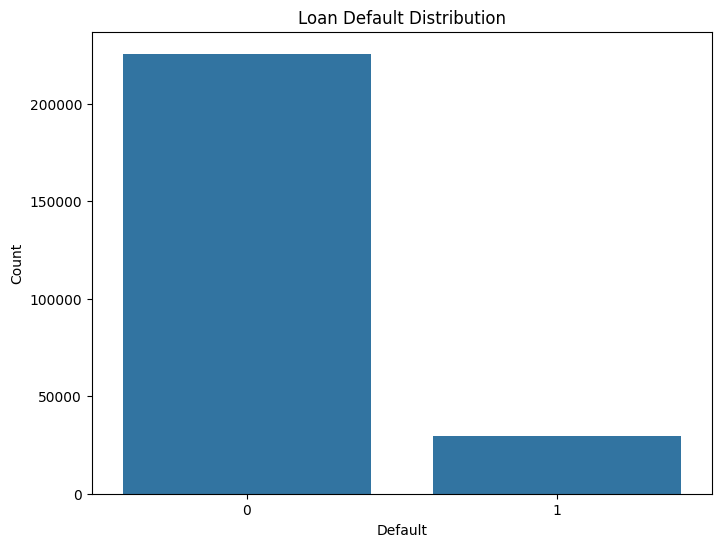

In [ ]:
## further explore the dataset

# check for any missing values/nulls, etc..
print("\nMissing Values per column: ")
print(df.isnull().sum())



# get summary statistics
print("\nSummary statistics:")
print(df.describe())



# check the distribution of the target variable,(the loan default in this case)
print("\nTarget variable distribution:")
print(df['Default'].value_counts())
print(df['Default'].value_counts(normalize=True).round(4) * 100, "%")



# visualise the distribution of loan defaults
plt.figure(figsize=(8, 6))
sns.countplot(x='Default', data=df)
plt.title('Loan Default Distribution')
plt.ylabel('Count')
plt.show()

# Data Preprocessing and Cleaning

In [ ]:
# Define lists for numerical and categorical features based on the dataset columns
numerical_features = ['Age', 'Income', 'LoanAmount', 'CreditScore',
                      'MonthsEmployed', 'NumCreditLines', 'InterestRate',
                      'LoanTerm', 'DTIRatio']



categorical_features = ['Education', 'EmploymentType', 'MaritalStatus',
                        'HasMortgage', 'HasDependents', 'LoanPurpose',
                        'HasCoSigner']




# check the categorical variables to understand their values
print("Examining categorical variables:")
for cat_feature in categorical_features:
    print(f"\n{cat_feature} value counts:")
    print(df[cat_feature].value_counts())

    print(f"Number of unique values: {df[cat_feature].nunique()}")




# Define function to detect outliers using the IQR method
# identify and handle outliers in numerical features -- outliers affect logistic regression performance
# use IQR method to identify the outliers
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[ (df[column] < lower_bound) | (df[column] > upper_bound) ][column]

    return outliers.shape[0], lower_bound, upper_bound




# Define function to cap outliers (winsorization)
def cap_outliers(df, column, lower_bound, upper_bound):
    df_copy = df.copy()
    df_copy[column] = df_copy[column].clip(lower=lower_bound, upper=upper_bound)

    return df_copy




# Detect and cap outliers for each numerical feature
print("\nOutlier Detection and Treatment:")
for col in numerical_features:
    # check for outliers
    outlier_count, lower_bound, upper_bound = identify_outliers(df, col)
    total_observations = len(df)
    outlier_percentage = (outlier_count / total_observations) * 100

    # print outlier stats for the current column
    print(f"{col}: {outlier_count} outliers ({outlier_percentage:.2f}% of data)")

    # can any outliers if they exist
    if outlier_count > 0:
        df = cap_outliers(df, col, lower_bound, upper_bound)

        print(f"  - Capped to range: [{lower_bound:.2f}, {upper_bound:.2f}]")





Examining categorical variables:

Education value counts:
Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64
Number of unique values: 4

EmploymentType value counts:
EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64
Number of unique values: 4

MaritalStatus value counts:
MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64
Number of unique values: 3

HasMortgage value counts:
HasMortgage
Yes    127677
No     127670
Name: count, dtype: int64
Number of unique values: 2

HasDependents value counts:
HasDependents
Yes    127742
No     127605
Name: count, dtype: int64
Number of unique values: 2

LoanPurpose value counts:
LoanPurpose
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: count, dtype: int64
Number of unique values: 5

HasCoSigner value count

In [ ]:
# check the values in each category
print("\nChecking actual values in categorical columns:")
for cat_feature in categorical_features:
    print(f"\n{cat_feature} unique values:")
    print(df[cat_feature].unique())



# Map categorical variables to numeric values for consistency
def safe_map(series, mapping_dict):
    # make a copy to avoid modifying the original series
    result = series.copy()

    # apply mapping only to values that exist in the mapping dictionary we created
    for old_val, new_val in mapping_dict.items():
        result = result.replace(old_val, new_val)

    return result



# Mapping for categorical features
df['Education'] = safe_map(df['Education'], {'High School': 0, "Bachelor's": 1, "Master's": 2, "PhD": 3})

df['EmploymentType'] = safe_map(df['EmploymentType'], {'Unemployed': 0, 'Self-employed': 1, 'Full-time': 2, 'Part-time': 3})

df['MaritalStatus'] = safe_map(df['MaritalStatus'], {'Single': 0, 'Married': 1, 'Divorced': 2})

df['HasMortgage'] = safe_map(df['HasMortgage'], {'No': 0, 'Yes': 1})

df['HasDependents'] = safe_map(df['HasDependents'], {'No': 0, 'Yes': 1})

df['HasCoSigner'] = safe_map(df['HasCoSigner'], {'No': 0, 'Yes': 1})

df['LoanPurpose'] = df['LoanPurpose'].astype('category').cat.codes  # convert using categorical codes



# Verify mappings for categorical features (excluding LoanPurpose since it's already coded)
print("\nVerifying categorical mappings:")
for cat_feature in categorical_features:
    if cat_feature != 'LoanPurpose':  # Skip LoanPurpose as it uses cat.codes
        print(f"\n{cat_feature} value counts after mapping:")
        print(df[cat_feature].value_counts())





Checking actual values in categorical columns:

Education unique values:
["Bachelor's" "Master's" 'High School' 'PhD']

EmploymentType unique values:
['Full-time' 'Unemployed' 'Self-employed' 'Part-time']

MaritalStatus unique values:
['Divorced' 'Married' 'Single']

HasMortgage unique values:
['Yes' 'No']

HasDependents unique values:
['Yes' 'No']

LoanPurpose unique values:
['Other' 'Auto' 'Business' 'Home' 'Education']

HasCoSigner unique values:
['Yes' 'No']

Verifying categorical mappings:

Education value counts after mapping:
Education
1    64366
0    63903
2    63541
3    63537
Name: count, dtype: int64

EmploymentType value counts after mapping:
EmploymentType
3    64161
0    63824
1    63706
2    63656
Name: count, dtype: int64

MaritalStatus value counts after mapping:
MaritalStatus
1    85302
2    85033
0    85012
Name: count, dtype: int64

HasMortgage value counts after mapping:
HasMortgage
1    127677
0    127670
Name: count, dtype: int64

HasDependents value counts afte

In [ ]:

# Check for duplicate rows and remove them if any
duplicate_count = df.duplicated().sum()
print(f"\nFound {duplicate_count} duplicate rows")

if duplicate_count > 0:
    df = df.drop_duplicates()
    print(f"Removed {duplicate_count} duplicate rows")





Found 0 duplicate rows


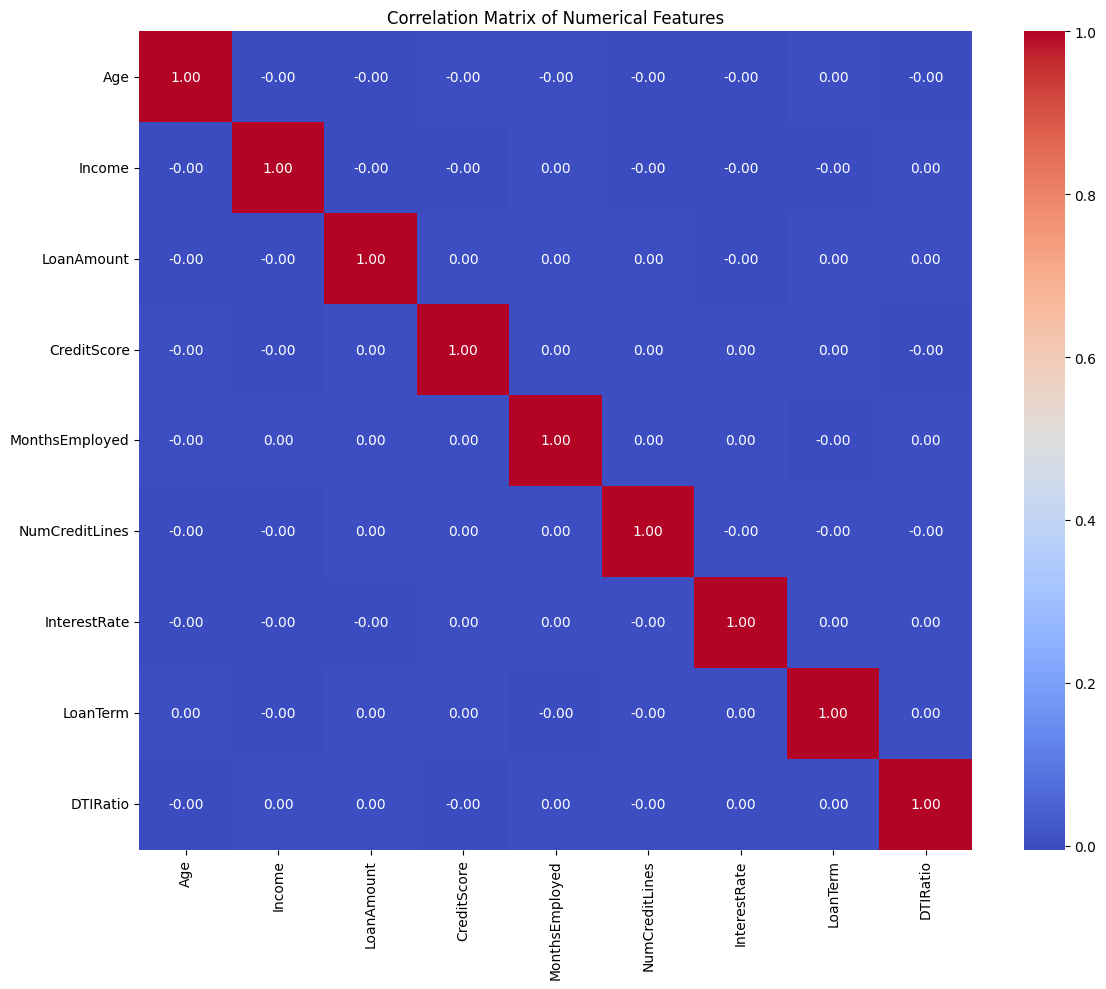


Summary of Preprocessing Steps:
1. Identified numerical and categorical features
2. Examined categorical variables
3. Detected and capped outliers in numerical features
4. Converted binary categorical variables to numeric format
5. Checked for and removed duplicate rows
6. Examined correlations between numerical features

Dataset shape after preprocessing: (255347, 18)

Sample of preprocessed data:


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
145619,9WKCM3JZ8Q,57,21763,187260,726,5,2,17.16,48,0.89,3,1,0,1,0,0,0,1
231354,X37Y8ZQYL7,36,76538,27388,682,37,4,13.37,24,0.88,3,0,1,0,1,4,1,0
87635,ET58V2FA7K,29,40231,122668,562,68,2,2.95,36,0.15,2,0,0,1,1,4,1,0
248786,ZJXFG9D40N,45,56782,132788,800,33,3,12.99,60,0.32,2,3,1,1,1,1,1,0
197282,70L9H3KZN9,62,69819,96042,626,73,4,12.95,24,0.12,3,0,2,0,1,0,0,0
104492,VVBC7EJFON,45,18282,237856,782,103,2,21.51,60,0.44,2,0,2,1,1,0,1,1
117314,IBNBN68S56,30,120420,185500,476,107,1,3.16,48,0.73,3,1,1,1,0,3,1,0
126563,115IJWEC7S,58,61589,178597,390,75,3,17.14,12,0.71,3,2,2,1,1,4,1,0
247993,3Z99HKEHVK,69,110797,6855,730,111,4,14.79,36,0.59,3,2,0,0,1,4,1,0
167486,J1C35UBMC1,36,122762,122891,413,8,1,23.40,24,0.40,1,1,2,1,1,4,1,0


In [ ]:
# Visualize correlation between numerical features using a heatmap
# examine the correlation between numerical features

# create a figure
plt.figure(figsize=(12, 10))

# compute the matrix
correlation_matrix = df[numerical_features].corr()

# generate the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# add title and adjust layout
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()

# display the plot
plt.show()



# Summary of preprocessing steps
print("\nSummary of Preprocessing Steps:")
print("1. Identified numerical and categorical features")
print("2. Examined categorical variables")
print("3. Detected and capped outliers in numerical features")
print("4. Converted binary categorical variables to numeric format")
print("5. Checked for and removed duplicate rows")
print("6. Examined correlations between numerical features")



# Display the dataset shape after preprocessing
print(f"\nDataset shape after preprocessing: {df.shape}")


# Check a sample of the preprocessed data
print("\nSample of preprocessed data:")
df.sample(20)

# Feature Engineering

In [ ]:
# f1: Create CreditScoreToLoanRatio feature to assess creditworthiness per dollar borrowed.
df['CreditScoreToLoanRatio'] = df['CreditScore'] / df['LoanAmount']
print("Created: CreditScoreToLoanRatio")



# f2: Calculate Monthly Payment using the fixed-rate loan formula.
# PMT = P * (r*(1+r)^n) / ((1+r)^n - 1), where P = LoanAmount, r = monthly interest rate, n = LoanTerm in months.
df['MonthlyInterestRate'] = df['InterestRate'] / 100 / 12  # Convert annual % to monthly decimal rate

df['MonthlyPayment'] = df['LoanAmount'] * (
    df['MonthlyInterestRate'] * (1 + df['MonthlyInterestRate']) ** df['LoanTerm']
) / ((1 + df['MonthlyInterestRate']) ** df['LoanTerm'] - 1)

print("Created: MonthlyPayment")


# f3: Create PaymentToIncomeRatio to assess affordability.
df['PaymentToIncomeRatio'] = (df['MonthlyPayment'] * 12) / df['Income']
print("Created: PaymentToIncomeRatio")


# f4: Create EmploymentToLoanTermRatio to indicate employment stability relative to the loan term.
df['EmploymentToLoanTermRatio'] = df['MonthsEmployed'] / df['LoanTerm']
print("Created: EmploymentToLoanTermRatio")



# f5: Create AgeCreditInteraction to capture interaction between Age and CreditScore.
df['AgeCreditInteraction'] = (df['Age'] * df['CreditScore']) / 1000  # Scaling factor for stability
print("Created: AgeCreditInteraction")



# f6: Create DebtBurden combining DTIRatio with log-transformed Income to reflect financial strain.
df['DebtBurden'] = df['DTIRatio'] * (1 - (np.log(df['Income']) / np.log(df['Income'].max())))
print("Created: DebtBurden with log-transformed income")



# f7: Create AgeGroup by binning Age into categorical groups.
age_bins = [0, 25, 35, 45, 55, 65, 100]
age_labels = ['<25', '25-35', '35-45', '45-55', '55-65', '65+']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Convert the categorical bins to numeric codes for modeling
df['AgeGroup'] = df['AgeGroup'].astype('category').cat.codes
print("Created: AgeGroup")

df.head(7)


Created: CreditScoreToLoanRatio
Created: MonthlyPayment
Created: PaymentToIncomeRatio
Created: EmploymentToLoanTermRatio
Created: AgeCreditInteraction
Created: DebtBurden with log-transformed income
Created: AgeGroup


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,HasCoSigner,Default,CreditScoreToLoanRatio,MonthlyInterestRate,MonthlyPayment,PaymentToIncomeRatio,EmploymentToLoanTermRatio,AgeCreditInteraction,DebtBurden,AgeGroup
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,...,1,0,0.010279,0.012692,1759.318045,0.245503,2.222222,29.120,0.020539,4
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,...,1,0,0.003680,0.004008,2337.519546,0.556199,0.250000,31.602,0.062190,5
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,...,0,1,0.003491,0.017642,6649.201648,0.947540,1.083333,20.746,0.015017,3
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,...,0,0,0.016585,0.005892,2007.188719,0.759508,0.000000,23.776,0.029987,1
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,...,0,0,0.069264,0.005425,216.773108,0.127283,0.166667,37.980,0.122088,4
5,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,...,1,1,0.007960,0.018933,4724.496758,0.627854,0.750000,18.000,0.004258,1
6,H8GXPAOS71,38,111188,177025,429,80,1,19.11,12,0.16,...,1,0,0.002423,0.015925,16323.313201,1.761699,6.666667,16.302,0.004019,2


In [ ]:
# Check for any NaN values created during feature engineering
nan_counts = df.isna().sum()
print("\nNaN counts after feature engineering:")
print(nan_counts[nan_counts > 0])  # Display only columns with NaN values



# Handle NaN values in numerical columns by filling with the median
if nan_counts.sum() > 0:
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
    print("Filled NaN values in numerical columns with medians")





NaN counts after feature engineering:
Series([], dtype: int64)



Summary statistics of engineered features:
       CreditScoreToLoanRatio  MonthlyPayment  PaymentToIncomeRatio  \
count           255347.000000   255347.000000         255347.000000   
mean                 0.009184     5649.062363              1.157286   
std                  0.014196     4731.401956              1.466405   
min                  0.001205       90.802843              0.008192   
25%                  0.002989     2317.463583              0.336087   
50%                  0.004502     4442.059863              0.682542   
75%                  0.008685     7259.845864              1.397868   
max                  0.167853    23735.666660             18.086068   

       EmploymentToLoanTermRatio  AgeCreditInteraction     DebtBurden  \
count              255347.000000         255347.000000  255347.000000   
mean                    2.264673             24.978221       0.031235   
std                     2.125724             11.292406       0.030766   
min                     

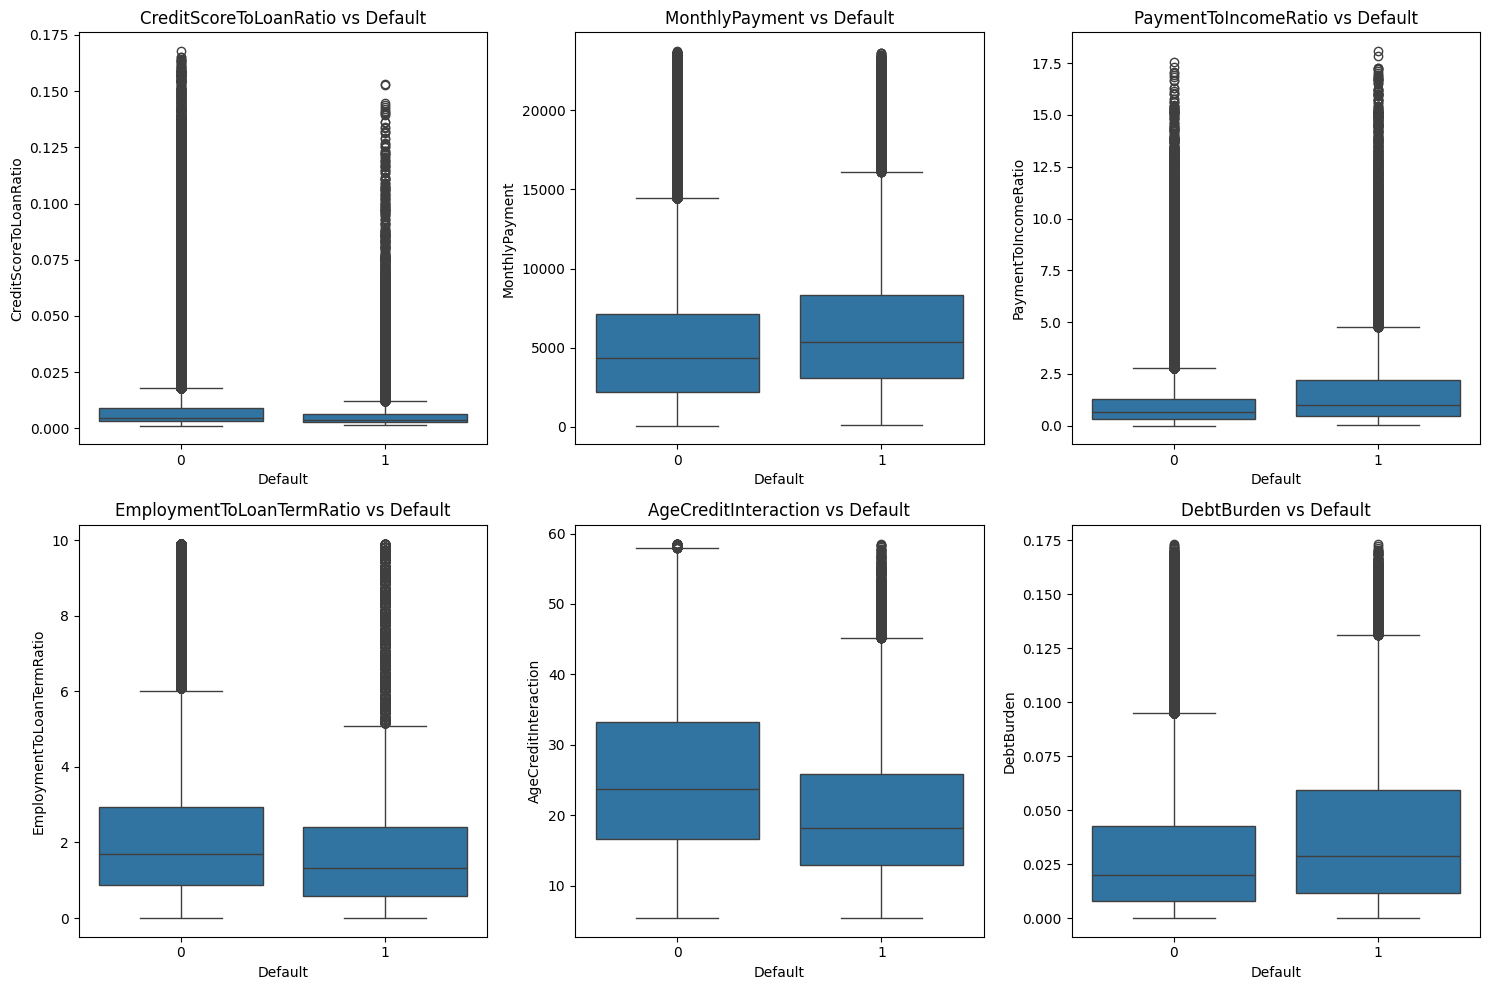

In [ ]:
# List the new engineered features for review
engineered_features = [
    'CreditScoreToLoanRatio', 'MonthlyPayment', 'PaymentToIncomeRatio',
    'EmploymentToLoanTermRatio', 'AgeCreditInteraction', 'DebtBurden', 'AgeGroup'
]


print("\nSummary statistics of engineered features:")
print(df[engineered_features].describe())



# Visualize the relationships between new features and the target variable (excluding AgeGroup as it is categorical)
plt.figure(figsize=(15, 10))
for i, feature in enumerate(engineered_features[:6]):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='Default', y=feature, data=df)
    plt.title(f'{feature} vs Default')

plt.tight_layout()
plt.show()



In [ ]:
# Update feature lists for modeling
updated_numerical_features = numerical_features + [
    'CreditScoreToLoanRatio', 'MonthlyPayment', 'PaymentToIncomeRatio',
    'EmploymentToLoanTermRatio', 'AgeCreditInteraction', 'DebtBurden'
]


# Original categorical features plus AgeGroup
updated_categorical_features = categorical_features + ['AgeGroup']


In [ ]:
# Address multicollinearity by checking correlation and dropping redundant features
correlation_matrix = df[updated_numerical_features].corr()
corr_age_agecredit = correlation_matrix.loc['Age', 'AgeCreditInteraction']
print("Correlation between Age and AgeCreditInteraction: {:.2f}".format(corr_age_agecredit))



# if absolute correlation is above 0.75, drop the redundant feature.
if abs(corr_age_agecredit) > 0.75:
    print("Dropping 'AgeCreditInteraction' due to high multicollinearity with 'Age'")
    df.drop(columns=['AgeCreditInteraction'], inplace=True)

    # and remove from the updated feature list.
    updated_numerical_features.remove('AgeCreditInteraction')



# Check correlation between Income and DebtBurden.
correlation_matrix = df[updated_numerical_features].corr()  # Recalculate after previous drop
corr_income_debt = correlation_matrix.loc['Income', 'DebtBurden']
print("Correlation between Income and DebtBurden: {:.2f}".format(corr_income_debt))



# If absolute correlation exceeds 0.75, drop DebtBurden.
if abs(corr_income_debt) > 0.75:
    print("Dropping 'DebtBurden' due to high correlation with 'Income'")
    df.drop(columns=['DebtBurden'], inplace=True)
    updated_numerical_features.remove('DebtBurden')


Correlation between Age and AgeCreditInteraction: 0.76
Dropping 'AgeCreditInteraction' due to high multicollinearity with 'Age'
Correlation between Income and DebtBurden: -0.77
Dropping 'DebtBurden' due to high correlation with 'Income'


Applied Standard Scaling to updated numerical features.


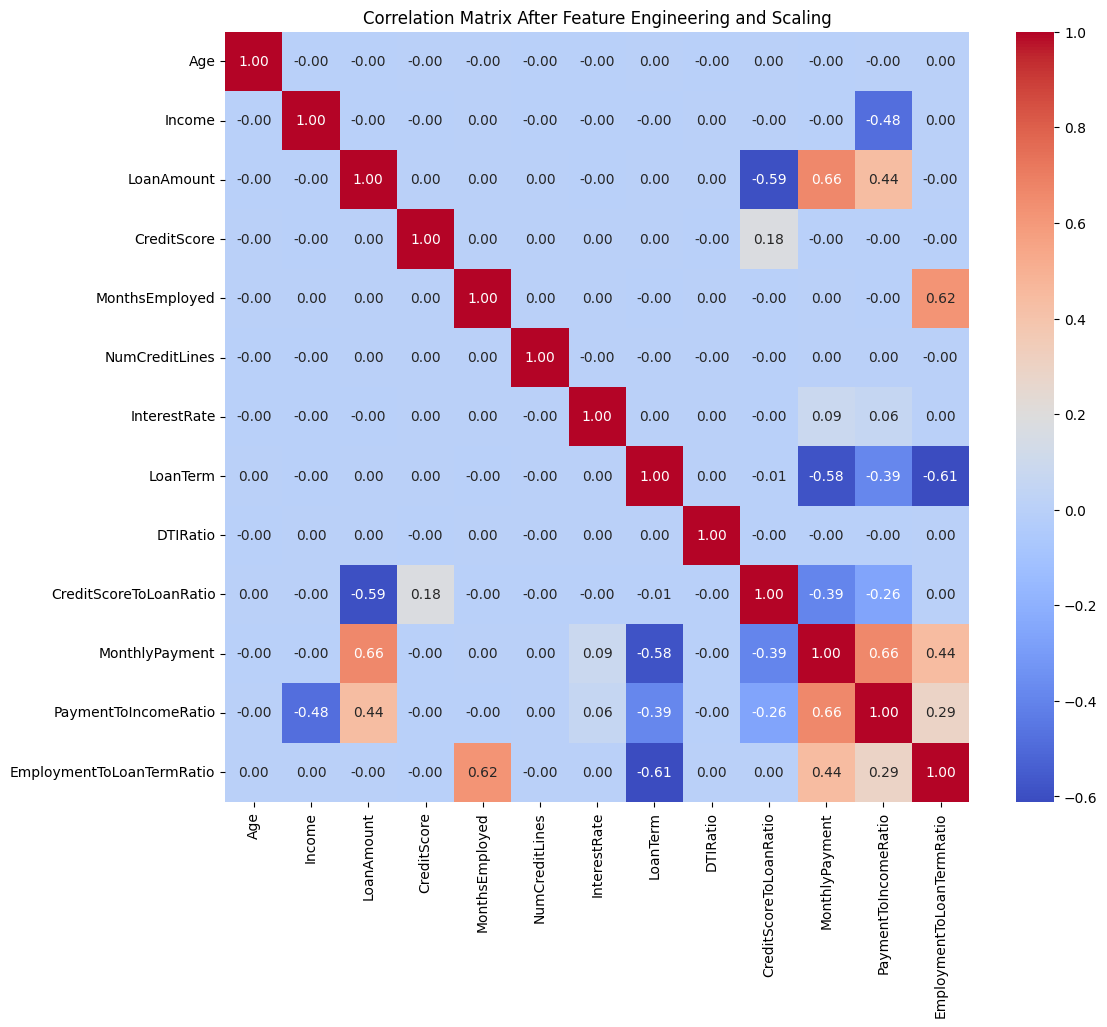

In [ ]:
# Optionally, apply scaling to numerical features to standardize them
from sklearn.preprocessing import StandardScaler


# Use StandardScaler to scale all numerical features.
scaler = StandardScaler()
df[updated_numerical_features] = scaler.fit_transform(df[updated_numerical_features])
print("Applied Standard Scaling to updated numerical features.")


# Visualize the updated correlation matrix after scaling
plt.figure(figsize=(12, 10))
sns.heatmap(df[updated_numerical_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix After Feature Engineering and Scaling')
plt.show()



In [ ]:
# Summary of feature engineering process
print("\nFeature Engineering Summary:")
print(f"Original features: {len(numerical_features) + len(categorical_features)}")
print(f"New features created: {len(engineered_features)}")

total_features = len(updated_numerical_features) + len(updated_categorical_features)
print(f"Total features for modeling: {total_features}")


# List any remaining high correlation pairs (absolute value > 0.75).
high_correl_pairs = []
for i in range(len(updated_numerical_features)):
    for j in range(i + 1, len(updated_numerical_features)):

        corr_value = correlation_matrix.iloc[i, j]

        if abs(corr_value) > 0.75:
            high_correl_pairs.append(
                (updated_numerical_features[i],
                 updated_numerical_features[j],
                 corr_value))

print(f"Highly correlated pairs (after adjustments): {len(high_correl_pairs)}")
for pair in high_correl_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")




Feature Engineering Summary:
Original features: 16
New features created: 7
Total features for modeling: 21
Highly correlated pairs (after adjustments): 0


In [ ]:
# Save the processed dataset for model training
df_processed = df.copy()
print("\nProcessed dataset shape:", df_processed.shape)
print("Sample of processed data:")
print(df_processed.sample(3))




Processed dataset shape: (255347, 24)
Sample of processed data:
            LoanID       Age    Income  LoanAmount  CreditScore  \
70060   X9XBHPG4XS -0.900474  1.661546   -0.752378    -0.310027   
129532  D1ZL2T51L9 -0.300083  0.455220   -0.846759    -0.335199   
165785  SXNNLYG147 -0.033242 -1.720515   -1.114077    -0.020543   

        MonthsEmployed  NumCreditLines  InterestRate  LoanTerm  DTIRatio  ...  \
70060         0.821458       -1.343791     -0.958764 -1.415845 -0.953645  ...   
129532       -0.650688        1.341937     -1.663963  0.705634 -0.433976  ...   
165785        0.013221        1.341937      0.487796 -0.001526 -0.780422  ...   

        HasDependents  LoanPurpose  HasCoSigner  Default  \
70060               0            3            1        0   
129532              1            3            1        0   
165785              0            3            0        0   

        CreditScoreToLoanRatio  MonthlyInterestRate  MonthlyPayment  \
70060                 -0.1490

# Data Splitting for Model Training

In [ ]:
# Drop non-feature columns that won't be used for modeling (e.g., identifiers)
features_to_drop = ['LoanID', 'MonthlyInterestRate']  # Modify if needed
model_df = df_processed.drop(columns=features_to_drop, errors='ignore')


# Separate predictor variables (X) and target variable (y)
X = model_df.drop('Default', axis=1)
y = model_df['Default']


print("Feature set shape:", X.shape)
print("Target variable shape:", y.shape)



Feature set shape: (255347, 21)
Target variable shape: (255347,)


In [ ]:
# Split the data into training and testing sets with stratification on the target variable
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")



Training set: 204277 samples
Testing set: 51070 samples


In [ ]:
# Check class distribution in training and testing sets
print("\nTraining set class distribution:")
print(pd.Series(y_train).value_counts(normalize=True).round(4) * 100, "%")
print("Testing set class distribution:")
print(pd.Series(y_test).value_counts(normalize=True).round(4) * 100, "%")



# Identify numerical and categorical columns in the training set
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\nNumerical features: {len(numerical_cols)}")
print(f"Categorical features: {len(categorical_cols)}")



# Ensure categorical columns are of type string for uniform processing (if using further encoding)
for col in categorical_cols:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)




Training set class distribution:
Default
0    88.39
1    11.61
Name: proportion, dtype: float64 %
Testing set class distribution:
Default
0    88.39
1    11.61
Name: proportion, dtype: float64 %

Numerical features: 19
Categorical features: 0


## Install CatBoost and Numpy Properly

In [ ]:
#dilshan edited
!pip install numpy==1.26.0 catboost



  Using cached numpy-1.26.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
Using cached numpy-1.26.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


In [ ]:
!pip install catboost scikit-learn imbalanced-learn

!pip install --upgrade numpy scikit-learn catboost

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.0
    Uninstalling numpy-1.26.0:
      Successfully uninstalled numpy-1.26.0


In [ ]:
# check the versions fro errors

import numpy as np
import catboost

print("NumPy Version:", np.__version__)
print("CatBoost Version:", catboost.__version__)

import sys
print(sys.executable)

!which pip
!pip --version

NumPy Version: 1.26.4
CatBoost Version: 1.2.7
/usr/bin/python3
/usr/local/bin/pip
pip 24.1.2 from /usr/local/lib/python3.11/dist-packages/pip (python 3.11)


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Compute class weights for imbalanced data.
# This helps the model pay more attention to the minority class.
neg_count = sum(y_train == 0)
pos_count = sum(y_train == 1)
class_weights = [1, neg_count / pos_count]

print("Class weights for CatBoost:", class_weights)



Class weights for CatBoost: [1, 7.61128909872692]


# Implement CatBoost

## Define the CatBoost Pipeline and Hyperparameter Grid

In [ ]:
from sklearn.pipeline import Pipeline



# build a pipeline with a single step: the CatBoostClassifier.
# set verbose=0 to minimize logging and fix random_state for reproducibility.
catboost_pipeline = Pipeline(steps=[
    ('classifier', CatBoostClassifier(verbose=0, random_state=42, class_weights=class_weights))
])




# Define a hyperparameter grid to tune key parameters:
# - iterations: number of boosting rounds
# - depth: tree depth (controls model complexity)
# - learning_rate: step size shrinkage used in updates to prevent overfitting
# - l2_leaf_reg: L2 regularization coefficient for leaf values

param_grid = {
    'classifier__iterations': [100, 200],
    'classifier__depth': [4, 6, 8],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__l2_leaf_reg': [1, 3, 5]
}



print("CatBoost pipeline and hyperparameter grid defined.")

CatBoost pipeline and hyperparameter grid defined.


## Hyperparameter Tuning with GridSearchCV

In [ ]:
# Set up stratified k-fold cross-validation to preserve the class distribution.
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)



# Initialize GridSearchCV with our pipeline and parameter grid.
# We use ROC AUC as the scoring metric since it is robust to class imbalance.
grid_search_cat = GridSearchCV(
    catboost_pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1
)



# Train the CatBoost model with hyperparameter tuning.
print("\nTraining CatBoost model with hyperparameter tuning...")
grid_search_cat.fit(X_train, y_train)




# Report the best parameters and the corresponding cross-validation score.
print("\nBest parameters found for CatBoost:")
print(grid_search_cat.best_params_)
print("Best cross-validation ROC AUC score:", grid_search_cat.best_score_)


Training CatBoost model with hyperparameter tuning...
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best parameters found for CatBoost:
{'classifier__depth': 4, 'classifier__iterations': 200, 'classifier__l2_leaf_reg': 3, 'classifier__learning_rate': 0.1}
Best cross-validation ROC AUC score: 0.7534640298404629


# Evaluate the CatBoost Model on the Test Set

In [ ]:
# Retrieve the best model from grid search.
best_cat_model = grid_search_cat.best_estimator_



# Generate predictions and predicted probabilities for the test set.
y_pred_cat = best_cat_model.predict(X_test)
y_proba_cat = best_cat_model.predict_proba(X_test)[:, 1]



# Import necessary evaluation metrics.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix



# Calculate evaluation metrics.
accuracy_cat = accuracy_score(y_test, y_pred_cat)
precision_cat = precision_score(y_test, y_pred_cat)
recall_cat = recall_score(y_test, y_pred_cat)
f1_cat = f1_score(y_test, y_pred_cat)
roc_auc_cat = roc_auc_score(y_test, y_proba_cat)



# Print the performance metrics.
print("CatBoost Test Set Performance:")
print(f"Accuracy: {accuracy_cat:.4f}")
print(f"Precision: {precision_cat:.4f}")
print(f"Recall: {recall_cat:.4f}")
print(f"F1 Score: {f1_cat:.4f}")
print(f"ROC AUC: {roc_auc_cat:.4f}")



print("\nClassification Report:")
print(classification_report(y_test, y_pred_cat))

CatBoost Test Set Performance:
Accuracy: 0.6912
Precision: 0.2278
Recall: 0.6940
F1 Score: 0.3430
ROC AUC: 0.7596

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     45139
           1       0.23      0.69      0.34      5931

    accuracy                           0.69     51070
   macro avg       0.59      0.69      0.57     51070
weighted avg       0.86      0.69      0.75     51070



## Visualize CatBoost Model Performance

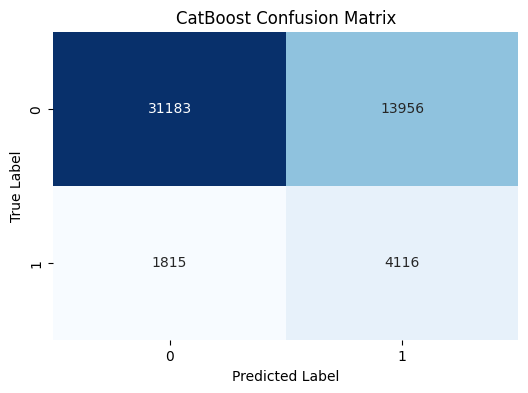

In [ ]:
# confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns


# Compute the confusion matrix.
cm_cat = confusion_matrix(y_test, y_pred_cat)


# Plot the confusion matrix using a heatmap.
plt.figure(figsize=(6, 4))
sns.heatmap(cm_cat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('CatBoost Confusion Matrix')
plt.show()



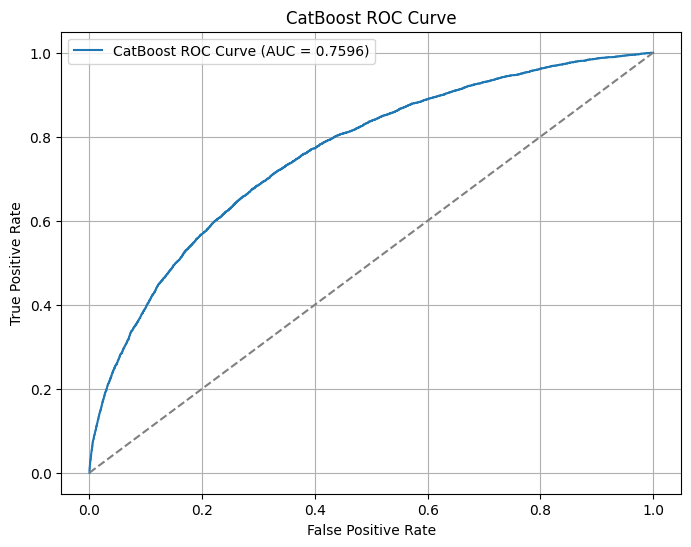

In [ ]:
# ROC Curve

from sklearn.metrics import roc_curve


# Compute false positive rate and true positive rate for the ROC curve.
fpr_cat, tpr_cat, _ = roc_curve(y_test, y_proba_cat)



plt.figure(figsize=(8, 6))
plt.plot(fpr_cat, tpr_cat, label=f'CatBoost ROC Curve (AUC = {roc_auc_cat:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random performance.
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CatBoost ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

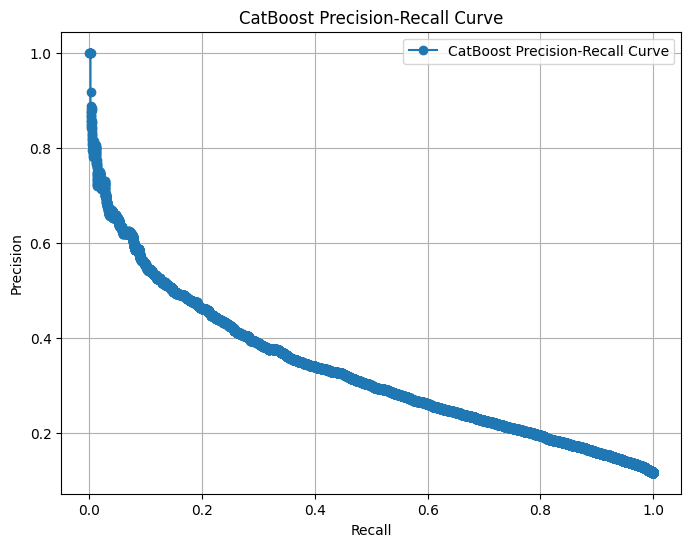

In [ ]:
# Precision- Recall

from sklearn.metrics import precision_recall_curve


# Calculate precision and recall values for various thresholds.
precision_vals_cat, recall_vals_cat, _ = precision_recall_curve(y_test, y_proba_cat)


plt.figure(figsize=(8, 6))
plt.plot(recall_vals_cat, precision_vals_cat, marker='o', label='CatBoost Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('CatBoost Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

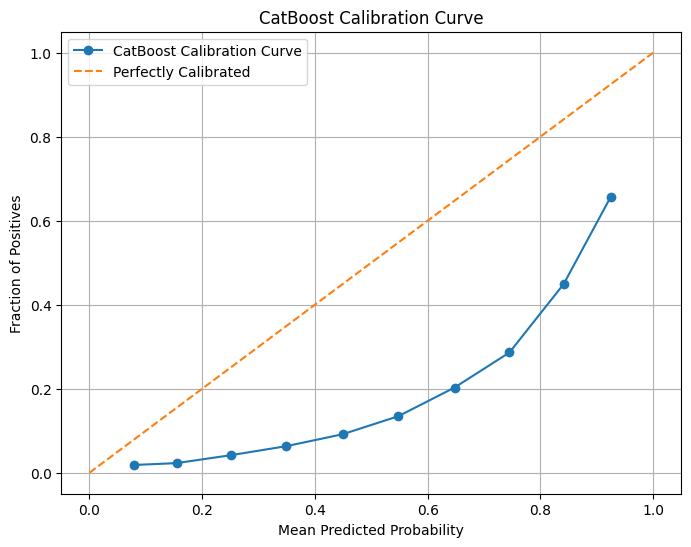

In [ ]:
# plot callibration curve

from sklearn.calibration import calibration_curve



# Calculate calibration curve data:
# 'prob_true_cat' is the true fraction of positives in each bin,
# and 'prob_pred_cat' is the mean predicted probability for each bin.
prob_true_cat, prob_pred_cat = calibration_curve(y_test, y_proba_cat, n_bins=10)



# Plot the Calibration Curve.
plt.figure(figsize=(8, 6))
plt.plot(prob_pred_cat, prob_true_cat, marker='o', label='CatBoost Calibration Curve')



# Plot the perfect calibration line (ideal model)
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('CatBoost Calibration Curve')
plt.legend()
plt.grid(True)
plt.show()

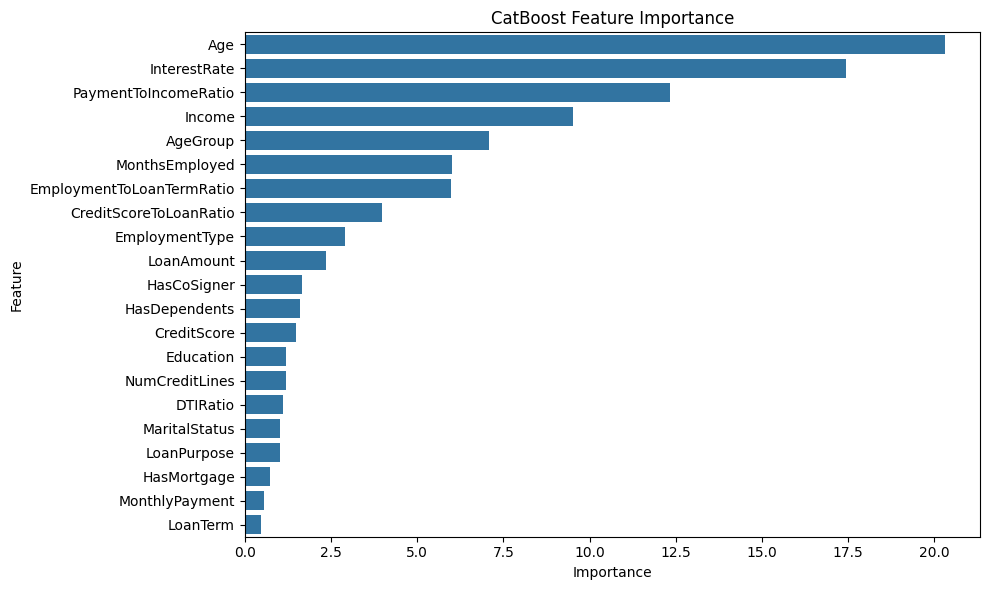

In [ ]:
# Feature Importance Plot for CatBoost

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Retrieve feature importances from the CatBoost model
# Note: Since our CatBoost model is part of a pipeline, we access it via 'named_steps'
feature_importances = best_cat_model.named_steps['classifier'].get_feature_importance()



# Extract feature names from X_train (assuming X_train is a DataFrame)
features = X_train.columns



# Create a DataFrame for easy plotting
fi_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})



# Sort the DataFrame by importance
fi_df.sort_values('Importance', ascending=False, inplace=True)



# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=fi_df)
plt.title('CatBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()